In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re

In [2]:
df = pd.read_csv('DataSets/spam_ham_dataset.csv')
df.head()

,text,label_num
0,Subject: enron methanol ; meter # : 988291\r\n...,0
1,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,"Subject: photoshop , windows , office . cheap ...",1
4,Subject: re : indian springs\r\nthis deal is t...,0


In [3]:
reviews = df.text.values

In [4]:
corpus = []
lemmatizer = WordNetLemmatizer()
for i in range(len(df.text)):
    words = re.sub('[^A-Za-z]',' ',reviews[i])
    words = words.lower()
    words = words.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in set(stopwords.words('english'))]
    sentences = " ".join(words)
    corpus.append(sentences)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 2500)
X = tfidf.fit_transform(corpus).toarray()

In [6]:
y = df.label_num.values
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [7]:
# For Imbalanced Data
from imblearn.over_sampling import SMOTE
smote = SMOTE(sampling_strategy = 'minority')
X,y = smote.fit_resample(X,y)

In [8]:
X.shape,y.shape

((7344, 2500), (7344,))

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [10]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

In [11]:
clf.fit(X,y)

GaussianNB()

In [12]:
clf.predict(X)

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [13]:
predicted = clf.predict(X)
truth = y

In [14]:
clf.score(X,y)

0.9918300653594772

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(predicted,truth)

<AxesSubplot:>

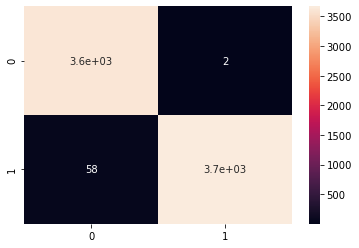

In [16]:
import seaborn as sn
sn.heatmap(cm,annot=True)

In [17]:
print(classification_report(predicted,truth))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3616
           1       1.00      0.98      0.99      3728

    accuracy                           0.99      7344
   macro avg       0.99      0.99      0.99      7344
weighted avg       0.99      0.99      0.99      7344

